<a href="https://colab.research.google.com/github/Andres8bit/Machine-Learning/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

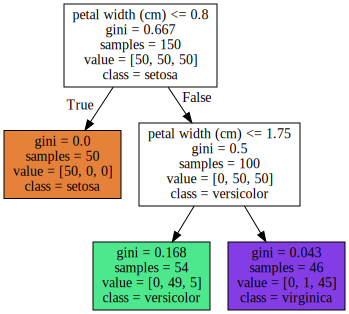

In [ ]:
# sklearn uses CART Classisification and Regression tree to train DecistionTree models.
# CART first takes the training data and split into two subsets based on a single
# feature k. And a threshold value tk. 
# This process is repeated until max_depth is reached.
# Overall complexity in prediciton O(log(m))
# training complexity O(n*mlog(m))

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

iris = load_iris()
X = iris.data[:,2:] #load data based on length and width of petal
y = iris.target

tree_classifier_gini = DecisionTreeClassifier(max_depth = 2)
tree_classifier_gini.fit(X,y)

export_graphviz(tree_classifier_gini,out_file=("iris_tree_gini.dot"),
                feature_names = iris.feature_names[2:],
                class_names=iris.target_names,
                filled = True)


Source.from_file("iris_tree_gini.dot")

# gini: measures impurity, @ gini = 0, node is pure all samples of this class 
#       belong to the same class
#         Gi = 1 - sum(square(pi,k)) from 0 -> n
#         pi,k := ratio of class k instances among the instances in the ith node 
#samples: the total number of instances that belong to this class

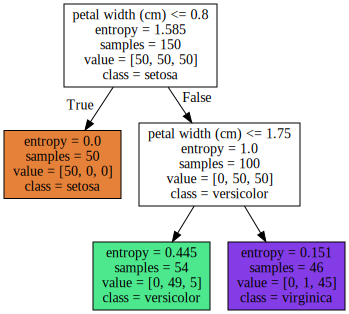

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

iris = load_iris()
X = iris.data[:,2:] #load data based on length and width of petal
y = iris.target

tree_classifier_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 2)
tree_classifier_entropy.fit(X,y)

export_graphviz(tree_classifier_entropy,out_file=("iris_tree_entropy.dot"),
                feature_names = iris.feature_names[2:],
                class_names=iris.target_names,
                filled = True)


Source.from_file("iris_tree_entropy.dot")

In [ ]:
# Uses the make_moons dataset to generate a random test set.
# Uses grid_search_cv to find the best max_lead_nodes hyperparameter
# for our decision tree
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X,y = make_moons(n_samples=10000, noise = 0.4, random_state = 42)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,
                                                 random_state = 42)

params = {'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, 
                              verbose=1, cv=3)

grid_search_cv.fit(X_train,y_train)
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test,y_pred)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    9.1s finished


0.8695

In [35]:
# Implements a random forest inorder to improve the accuracy of our model
# Creates 1,000 trees.

from sklearn.base import clone
from sklearn.model_selection import ShuffleSplit
from scipy.stats import mode
import numpy as np

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size = len(X_train) - n_instances, 
                  random_state=42)

for mini_train_index,mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train,y_mini_train))

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train,y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train,y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
  
Y_pred = np.empty([n_trees,len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
  Y_pred[tree_index] =  tree.predict(X_test)

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

accuracy_score(y_test,y_pred_majority_votes.reshape([-1]))

0.872